In [ ]:
#import the necessary Libraries
import pandas as pd
import numpy as np
from google.colab import files
import matplotlib.pyplot as plt
import seaborn as sns
import time
from collections import Counter
from imblearn.over_sampling import SMOTE
import matplotlib.ticker as ticker
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import KFold # import KFold

In [ ]:
# Upload the dataset
uploaded = files.upload()

# Load data
data = pd.read_csv("RTA Dataset.csv")

Saving RTA Dataset.csv to RTA Dataset.csv


# Dataset Overview

Quincy Ng Tze Ern (0356228)

In [ ]:
# Displaying the first few rows
data.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [ ]:
# Displaying basic dataset info
print("Information of the Dataset:")
data.info()

Information of the Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Roa

In [ ]:
# Displaying Extra Dataset Info
print("Size of the Dataset:")
data.shape

Size of the Dataset:


(12316, 32)

In [ ]:
data.columns

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity'],
      dtype='object')

In [ ]:
# Displaying Extra Dataset Info
print("Size of the Dataset:")
data.dtypes

Size of the Dataset:


,0
Time,object
Day_of_week,object
Age_band_of_driver,object
Sex_of_driver,object
Educational_level,object
Vehicle_driver_relation,object
Driving_experience,object
Type_of_vehicle,object
Owner_of_vehicle,object
Service_year_of_vehicle,object


In [ ]:
data.groupby('Accident_severity').size()

,0
Accident_severity,
Fatal injury,158
Serious Injury,1743
Slight Injury,10415


In [ ]:
# Descriptive stats to understand item frequencies and transaction distribution
print("\nDescriptive Statistics:")
print(data.describe(include='all'))

# NaN values shown due the the dataset mainly being categorical data


Descriptive Statistics:
            Time Day_of_week Age_band_of_driver Sex_of_driver  \
count      12316       12316              12316         12316   
unique      1074           7                  5             3   
top     15:30:00      Friday              18-30          Male   
freq         120        2041               4271         11437   
mean         NaN         NaN                NaN           NaN   
std          NaN         NaN                NaN           NaN   
min          NaN         NaN                NaN           NaN   
25%          NaN         NaN                NaN           NaN   
50%          NaN         NaN                NaN           NaN   
75%          NaN         NaN                NaN           NaN   
max          NaN         NaN                NaN           NaN   

         Educational_level Vehicle_driver_relation Driving_experience  \
count                11575                   11737              11487   
unique                   7                      

ADD: Overall, this dataset has a lot of missing values, mainly made up of categorical data etc etc

# Exploratory Data Analysis (EDA)

Quincy Ng Tze Ern (0356228)

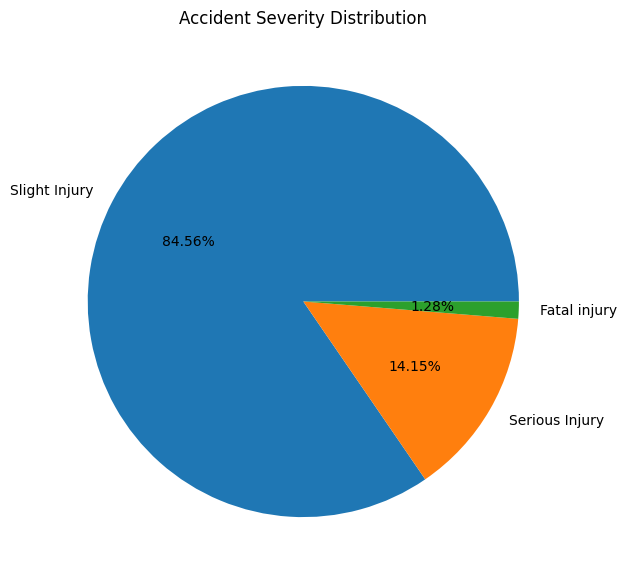

In [ ]:
# Severity Distribution
plt.figure(figsize=(10, 7))
plt.pie(x=data['Accident_severity'].value_counts().values,
        labels=data['Accident_severity'].value_counts().index,
        autopct='%2.2f%%')
plt.title("Accident Severity Distribution")
plt.show()

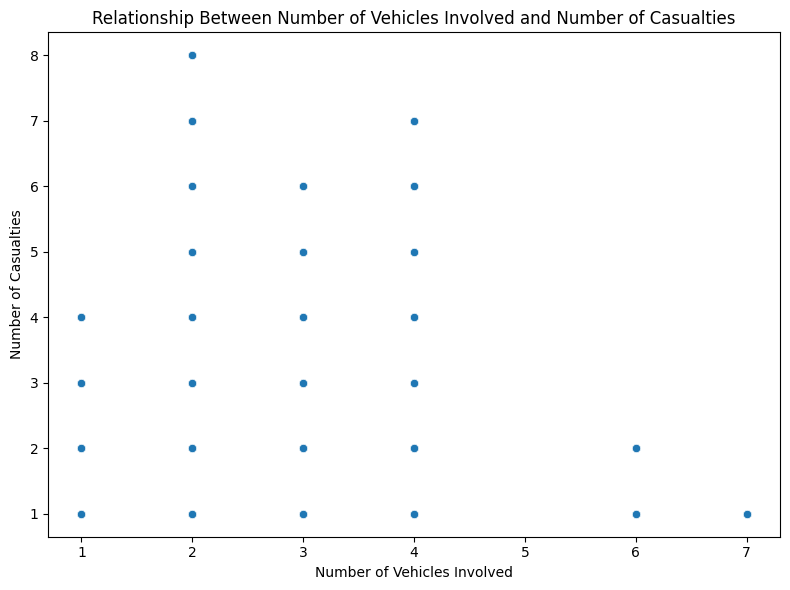

In [ ]:
#Relationship Between Number of Vehicles Involved and Number of Casualties
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['Number_of_vehicles_involved'], y=data['Number_of_casualties'])
plt.title("Relationship Between Number of Vehicles Involved and Number of Casualties")
plt.xlabel("Number of Vehicles Involved")
plt.ylabel("Number of Casualties")
plt.tight_layout()
plt.show()

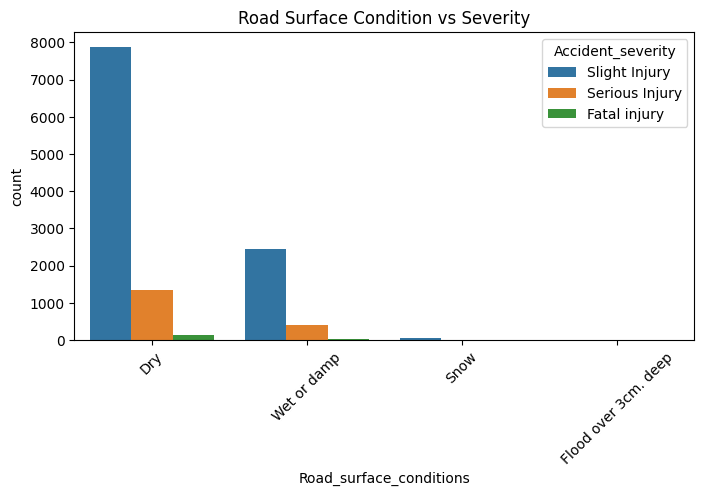

In [ ]:
# Road Surface vs Severity
plt.figure(figsize=(8, 4))
sns.countplot(data=data, x='Road_surface_conditions', hue='Accident_severity')
plt.title("Road Surface Condition vs Severity")
plt.xticks(rotation=45)
plt.show()

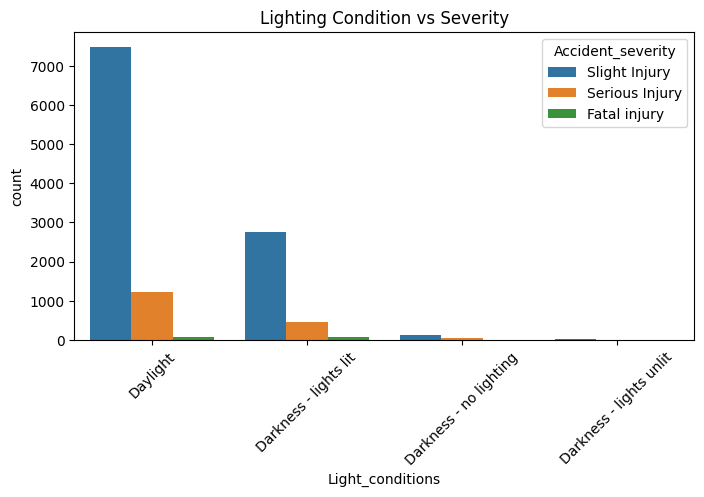

In [ ]:
# Lighting Condition vs Severity
plt.figure(figsize=(8, 4))
sns.countplot(data=data, x='Light_conditions', hue='Accident_severity')
plt.title("Lighting Condition vs Severity")
plt.xticks(rotation=45)
plt.show()

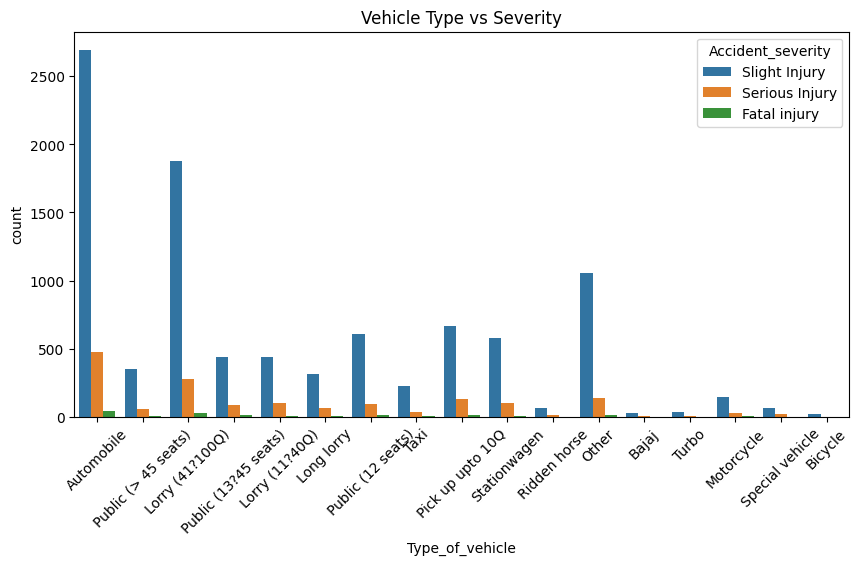

In [ ]:
# Vehicle Type vs Severity
plt.figure(figsize=(10, 5))
sns.countplot(data=data, x='Type_of_vehicle', hue='Accident_severity')
plt.title("Vehicle Type vs Severity")
plt.xticks(rotation=45)
plt.show()

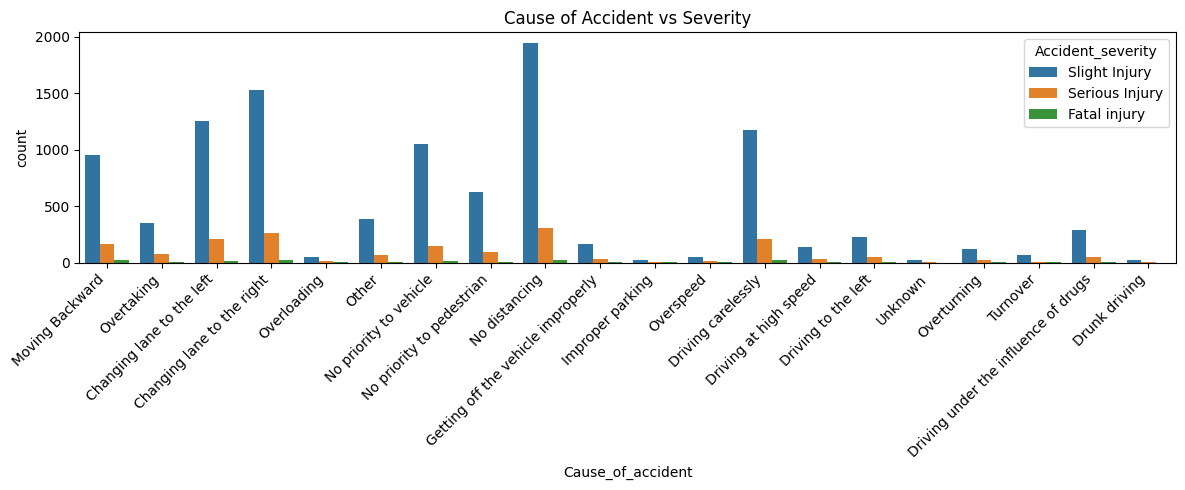

In [ ]:
# Cause of Accident vs Severity
plt.figure(figsize=(12, 5))
sns.countplot(data=data, x='Cause_of_accident', hue='Accident_severity')
plt.title("Cause of Accident vs Severity")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: UserWarning: 
The palette list has fewer values (3) than needed (6) and will cycle, which may produce an uninterpretable plot.
  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/

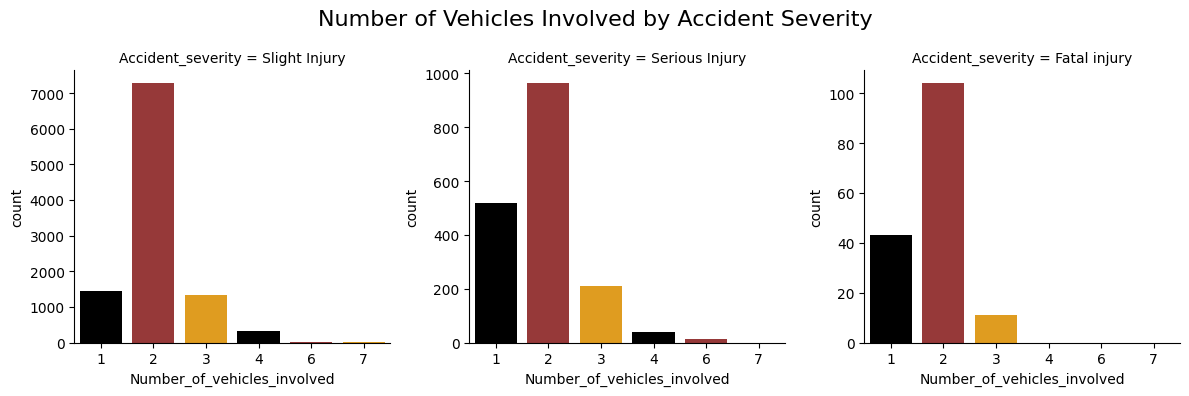

In [ ]:
# Number of Vehicles Involved by Accident Severity
# creating a facet grid with columns as survived=0 and survived=1
grid = sns.FacetGrid(data=data, col='Accident_severity', height=4, aspect=1, sharey=False)
grid.fig.suptitle("Number of Vehicles Involved by Accident Severity", fontsize=16)
grid.fig.subplots_adjust(top=0.85)
# mapping bar plot and the data on to the grid
grid.map(sns.countplot, 'Number_of_vehicles_involved', palette=['black', 'brown', 'orange'])
plt.show()

#Data Preprocessing

Quincy Ng Tze Ern (0356228)

Dropping Values that causes imbalance

In [ ]:
data.isnull().sum()

,0
Time,0
Day_of_week,0
Age_band_of_driver,0
Sex_of_driver,0
Educational_level,741
Vehicle_driver_relation,579
Driving_experience,829
Type_of_vehicle,950
Owner_of_vehicle,482
Service_year_of_vehicle,3928


In [ ]:
# dropping columns that can cause imbalance while imputation
lists=['Driving_experience','Vehicle_driver_relation', 'Work_of_casuality', 'Fitness_of_casuality',
       'Casualty_severity','Sex_of_driver',
       'Educational_level','Defect_of_vehicle','Owner_of_vehicle',
       'Service_year_of_vehicle', 'Road_surface_type','Sex_of_casualty']
data.drop(columns = lists, inplace=True)

In [ ]:
data.columns = data.columns.str.replace('_', ' ').str.strip()

In [ ]:
data.columns

Index(['Time', 'Day of week', 'Age band of driver', 'Type of vehicle',
       'Area accident occured', 'Lanes or Medians', 'Road allignment',
       'Types of Junction', 'Road surface conditions', 'Light conditions',
       'Weather conditions', 'Type of collision',
       'Number of vehicles involved', 'Number of casualties',
       'Vehicle movement', 'Casualty class', 'Age band of casualty',
       'Pedestrian movement', 'Cause of accident', 'Accident severity'],
      dtype='object')

Filling Missing Values

In [ ]:
# fill missing values with mean column values
data['Age band of driver'].fillna(data['Age band of driver'].mode()[0], inplace=True)
data['Type of vehicle'].fillna(data['Type of vehicle'].mode()[0], inplace=True)
data['Area accident occured'].fillna(data['Area accident occured'].mode()[0], inplace=True)
data['Road allignment'].fillna(data['Road allignment'].mode()[0], inplace=True)
data['Type of collision'].fillna(data['Type of collision'].mode()[0], inplace=True)
data['Vehicle movement'].fillna(data['Vehicle movement'].mode()[0], inplace=True)
data['Lanes or Medians'].fillna(data['Lanes or Medians'].mode()[0], inplace=True)
data['Types of Junction'].fillna(data['Types of Junction'].mode()[0], inplace=True)

/tmp/ipython-input-21-4120175017.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age band of driver'].fillna(data['Age band of driver'].mode()[0], inplace=True)
/tmp/ipython-input-21-4120175017.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'd

In [ ]:
data.isnull().sum()

,0
Time,0
Day of week,0
Age band of driver,0
Type of vehicle,0
Area accident occured,0
Lanes or Medians,0
Road allignment,0
Types of Junction,0
Road surface conditions,0
Light conditions,0


Standardizing Time Features

In [ ]:
def formatTimeCol(t):
    t = t[:2]
    if ":" in t:
        t = t[:1]

    return int(t)

def categorizeTimeCol(t):
    if t >= 6 and t< 18:
        return "Day"
    else:
        return "Night"


data['Time'] = data['Time'].apply(lambda x: formatTimeCol(x))
data['Time'] = data['Time'].apply(lambda x: categorizeTimeCol(x))

data['Time'].value_counts(dropna=False)

,count
Time,
Day,8361
Night,3955


Encoding Categorical Variables

In [ ]:
data_mapProcess = data

data_mapProcess['Time'] = data_mapProcess['Time'].map({'Day': 0, 'Night': 1})
data_mapProcess['Age band of driver'] = data_mapProcess['Age band of driver'].map({'Under 18': 0, '18-30': 1, '31-50': 2, 'Over 51': 3,'Unknown': -1})
data_mapProcess['Accident severity'] = data_mapProcess['Accident severity'].map({'Slight Injury': 0, 'Serious Injury': 1, 'Fatal injury': 2})

mapped_cols = ['Driving experience', 'Sex of driver', 'Age band of driver', 'Educational level', 'Time', 'Accident severity']
data_afterMap = data_mapProcess

In [ ]:
data_afterMap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  int64 
 1   Day of week                  12316 non-null  object
 2   Age band of driver           12316 non-null  int64 
 3   Type of vehicle              12316 non-null  object
 4   Area accident occured        12316 non-null  object
 5   Lanes or Medians             12316 non-null  object
 6   Road allignment              12316 non-null  object
 7   Types of Junction            12316 non-null  object
 8   Road surface conditions      12316 non-null  object
 9   Light conditions             12316 non-null  object
 10  Weather conditions           12316 non-null  object
 11  Type of collision            12316 non-null  object
 12  Number of vehicles involved  12316 non-null  int64 
 13  Number of casualties         12

Feature Engineering

In [ ]:
feature_data = data.copy()

In [ ]:
#Weekend Indicator
feature_data['Is Weekend'] = feature_data['Day of week'].isin(['Saturday', 'Sunday']).astype(int)

In [ ]:
#Night Condition Flag
if 'Time' in feature_data.columns:
    feature_data['Night Condition'] = feature_data['Time']  # already 0 or 1 from earlier mapping
else:
    night_cols = [col for col in feature_data.columns if 'Lighting Dark' in col or 'Lighting Night' in col]
    feature_data['Night Condition'] = feature_data[night_cols].sum(axis=1) if night_cols else 0

In [ ]:
#Traffic Complexity Index
if all(col in feature_data.columns for col in ['Type of collision', 'Types of Junction', 'Vehicle movement']):
    feature_data['Traffic Complexity'] = (
        feature_data['Type of collision'].astype(str) + "_" +
        feature_data['Types of Junction'].astype(str) + "_" +
        feature_data['Vehicle movement'].astype(str)
    )
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    feature_data['Traffic Complexity'] = le.fit_transform(feature_data['Traffic Complexity'])
else:
    print("One or more columns needed for Traffic Complexity not found.")

In [ ]:
# Display the new feature columns
engineered_cols = ['Is Weekend', 'Night Condition','Traffic Complexity']
print("Engineered features added:\n", feature_data[engineered_cols].head())

Engineered features added:
    Is Weekend  Night Condition  Traffic Complexity
0           0                0                 141
1           0                0                 224
2           0                0                  91
3           1                1                 279
4           1                1                 279


In [ ]:
feature_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  int64 
 1   Day of week                  12316 non-null  object
 2   Age band of driver           12316 non-null  int64 
 3   Type of vehicle              12316 non-null  object
 4   Area accident occured        12316 non-null  object
 5   Lanes or Medians             12316 non-null  object
 6   Road allignment              12316 non-null  object
 7   Types of Junction            12316 non-null  object
 8   Road surface conditions      12316 non-null  object
 9   Light conditions             12316 non-null  object
 10  Weather conditions           12316 non-null  object
 11  Type of collision            12316 non-null  object
 12  Number of vehicles involved  12316 non-null  int64 
 13  Number of casualties         12

In [ ]:
print(data.select_dtypes(include='object').columns)

Index(['Day of week', 'Type of vehicle', 'Area accident occured',
       'Lanes or Medians', 'Road allignment', 'Types of Junction',
       'Road surface conditions', 'Light conditions', 'Weather conditions',
       'Type of collision', 'Vehicle movement', 'Casualty class',
       'Age band of casualty', 'Pedestrian movement', 'Cause of accident'],
      dtype='object')


In [ ]:
data_label_encoded = feature_data.copy()
label_encoders = {}

# Encode all object columns with separate encoders
for col in data_label_encoded.select_dtypes(include='object').columns:
    le = LabelEncoder()
    data_label_encoded[col] = le.fit_transform(data_label_encoded[col].astype(str))
    label_encoders[col] = le

In [ ]:
# View results
print("Label Encoded shape:", data_label_encoded.shape)

Label Encoded shape: (12316, 23)


# Data Mining Techniques

Nuraisyah Dahiyah Binti Hashim (0369885)

In [ ]:
# -----------------------------------------
# Data Preparetion for Predictive Modelling
# -----------------------------------------

# Define Target and Features
target = 'Accident severity'  # Target variable is accident severity (0 = Slight, 1 = Serious, 2 = Fatal)
features = [col for col in data_label_encoded.columns if col != target]

X = data_label_encoded[features]  # Feature set
y = data_label_encoded[target]    # Labels

# Check class imbalance
print("Class Distribution (Normalized):")
print(y.value_counts(normalize=True))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Normalize features for models that require it (Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Justification: Scaling is essential for Logistic Regression to work optimally

Class Distribution (Normalized):
Accident severity
0    0.845648
1    0.141523
2    0.012829
Name: proportion, dtype: float64


Random Forest Feature Importance:
                        Feature  Importance
18            Cause of accident    0.099996
3               Type of vehicle    0.086046
21           Traffic Complexity    0.084563
4         Area accident occured    0.079030
1                   Day of week    0.075579
5              Lanes or Medians    0.063058
2            Age band of driver    0.062979
12  Number of vehicles involved    0.051285
13         Number of casualties    0.048134
14             Vehicle movement    0.047730


/tmp/ipython-input-36-1979033466.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=top_rf, palette='viridis')


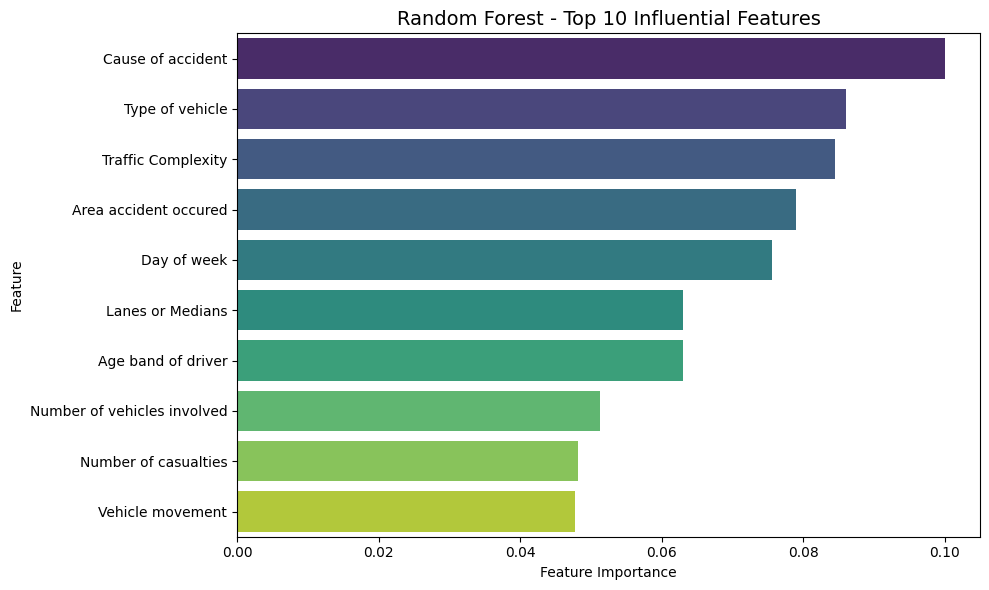

In [ ]:
# ---------------------------
# Random Forest Classification
# ----------------------------

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import numpy as np
import pandas as pd


# Train Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)

# Extracting Important Features (objective: identify significant variables)
importances = rf.feature_importances_
feature_names = X.columns

# Combine features and their importance into a DataFrame
importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("Random Forest Feature Importance:")
print(importances_df.head(10))

# Plot Top 10 Features from Random Forest
top_rf = importances_df.head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_rf, palette='viridis')
plt.title("Random Forest - Top 10 Influential Features", fontsize=14)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/tmp/ipython-input-37-2363001504.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=top_log, palette='crest')



 Logistic Regression Feature Importance:
                        Feature  Importance
12  Number of vehicles involved    0.404551
11            Type of collision    0.280371
13         Number of casualties    0.242338
21           Traffic Complexity    0.231750
16         Age band of casualty    0.179143
2            Age band of driver    0.128558
19                   Is Weekend    0.108110
0                          Time    0.095314
20              Night Condition    0.095314
15               Casualty class    0.082080


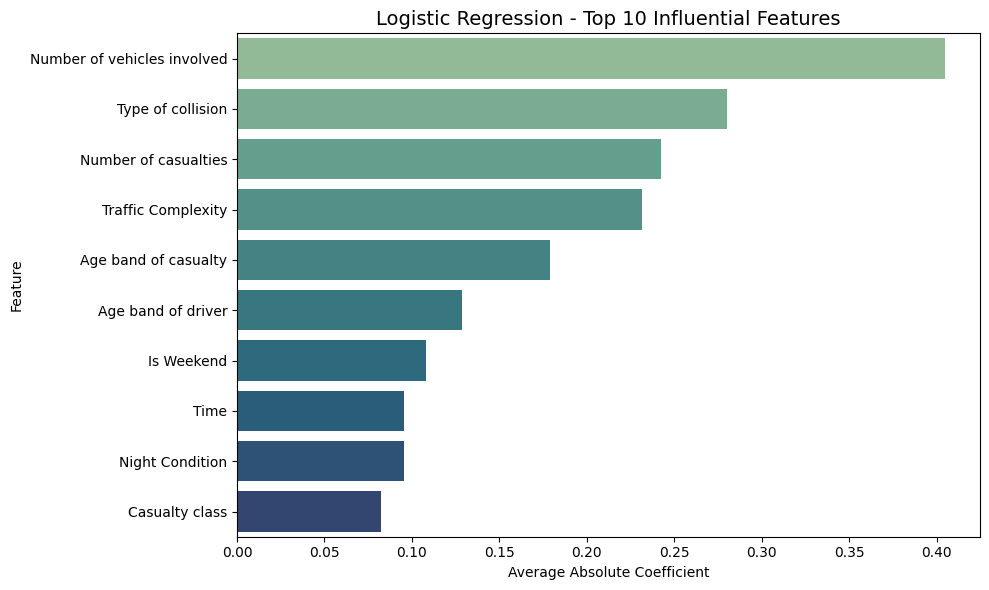

In [ ]:

# ---------------------------
# Logistic Regression
# ----------------------------

# Fit logistic regression
logreg = LogisticRegression(max_iter=1000, multi_class='ovr', random_state=42)
logreg.fit(X_train_scaled, y_train)
log_preds = logreg.predict(X_test_scaled)

# Coefficients as feature importance
log_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': np.abs(logreg.coef_).mean(axis=0)
}).sort_values(by='Importance', ascending=False)

print("\n Logistic Regression Feature Importance:")
print(log_importance.head(10))

# Plot Top 10 Features from Logistic Regression
top_log = log_importance.head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_log, palette='crest')
plt.title("Logistic Regression - Top 10 Influential Features", fontsize=14)
plt.xlabel("Average Absolute Coefficient")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# improvements: check for linear seperability (PCA), add polynomial features, or kernel transformation

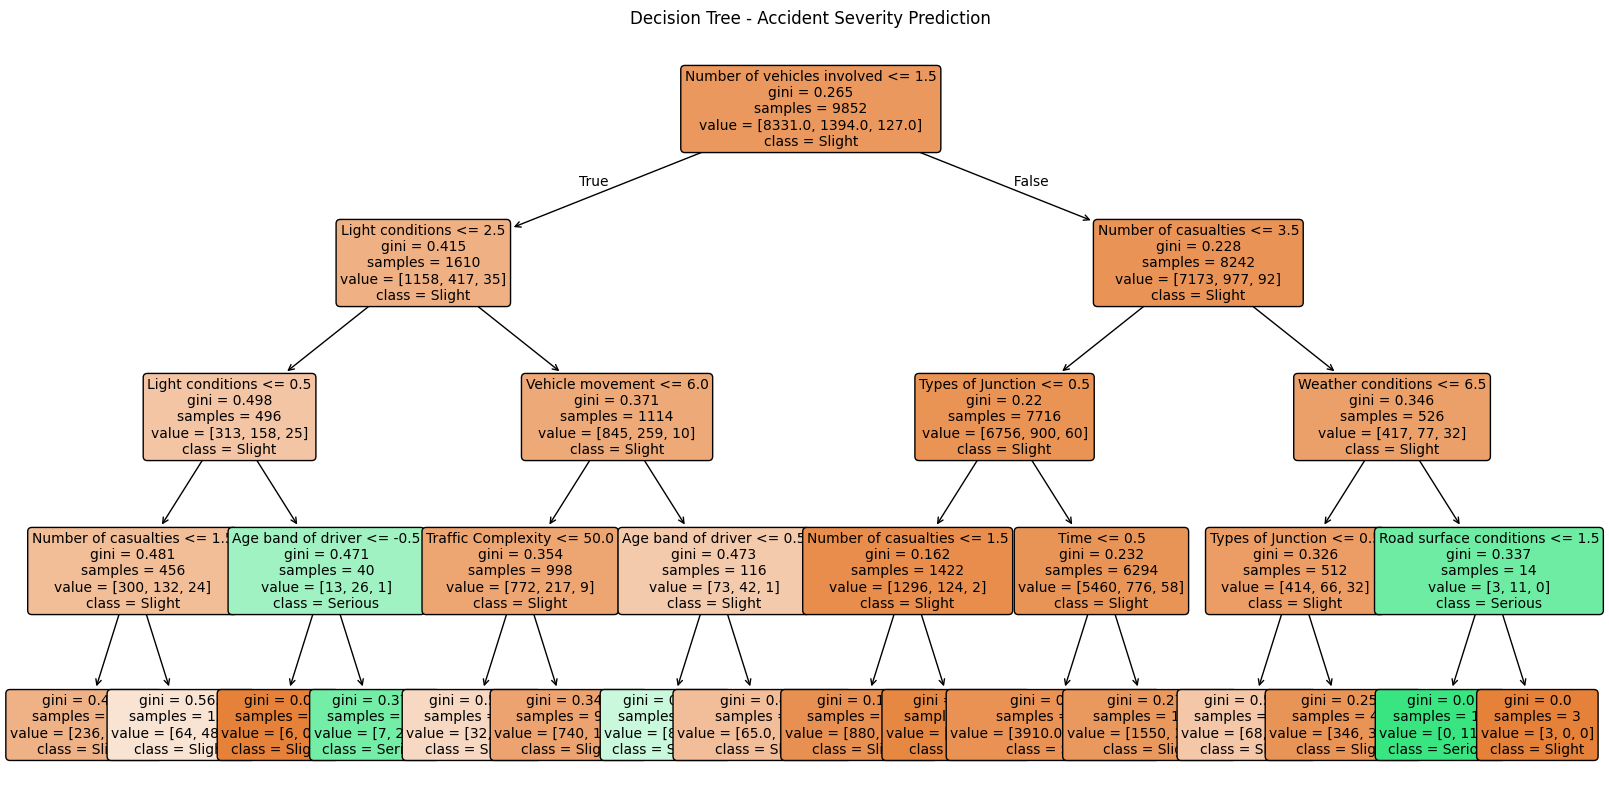

In [ ]:
# --------------------------------------------
# Decision Tree (Predicting Accident Severity)
# --------------------------------------------

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

# Train a Decision Tree on unscaled data
dt_model = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_model.fit(X_train, y_train)

plt.figure(figsize=(20,10))
tree.plot_tree(
    dt_model,
    feature_names=X.columns,
    class_names=['Slight', 'Serious', 'Fatal'],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree - Accident Severity Prediction")
plt.show()

# add k-fold cross-validation or plot learning curves

# Model Validation

Foo Juan Ray (0350994)


In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline


In [ ]:
from sklearn.ensemble import RandomForestClassifier

smote = SMOTE(random_state=42)
model = RandomForestClassifier(random_state=42)

pipeline = Pipeline([
    ('smote', smote),
    ('classifier', model)
])


In [ ]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
y_pred = cross_val_predict(pipeline, X_train, y_train, cv=skf)


In [ ]:
data.columns = data.columns.str.strip()



In [ ]:
data = pd.read_csv("RTA Dataset.csv")
data.columns = data.columns.str.strip()
data = data.dropna(subset=['Accident_severity'])

In [ ]:
from sklearn.model_selection import train_test_split

X = data.drop(columns=['Accident_severity'])
y = data['Accident_severity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)


In [ ]:
from sklearn.metrics import classification_report

# For each model
report = classification_report(y_test, rf_preds, output_dict=True)
print("Random Forest:")
print(f"Accuracy: {accuracy_score(y_test, rf_preds):.4f}")
print(f"Class 0 Precision: {report['0']['precision']:.4f}")
print(f"Class 0 Recall: {report['0']['recall']:.4f}")
print(f"Class 0 F1: {report['0']['f1-score']:.4f}")


Random Forest:
Accuracy: 0.0134
Class 0 Precision: 0.0123
Class 0 Recall: 0.9677
Class 0 F1: 0.0243


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



=== RANDOM FOREST ===
Accuracy: 85.22%
Class 0 Recall: 4.26%
Class 0 F1: 8.16%


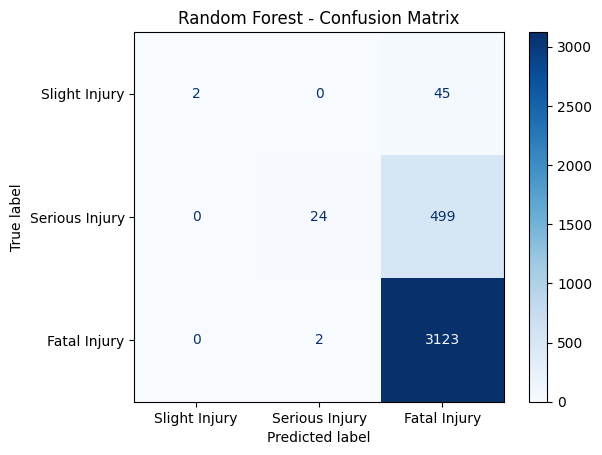


=== DECISION TREE ===
Accuracy: 83.87%
Class 0 Recall: 31.91%
Class 0 F1: 33.33%


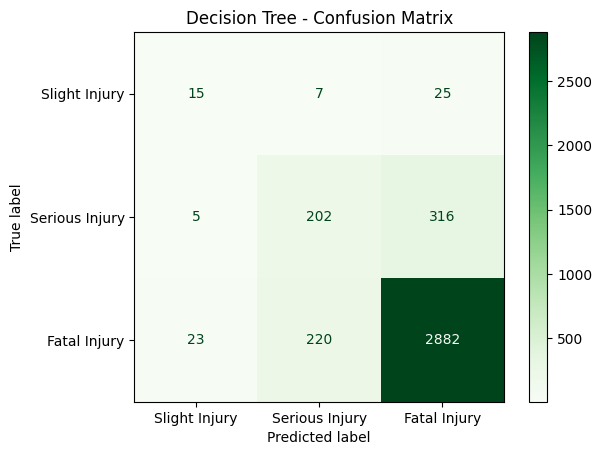


=== LOGISTIC REGRESSION ===
Accuracy: 84.65%
Class 0 Recall: 6.38%
Class 0 F1: 11.54%


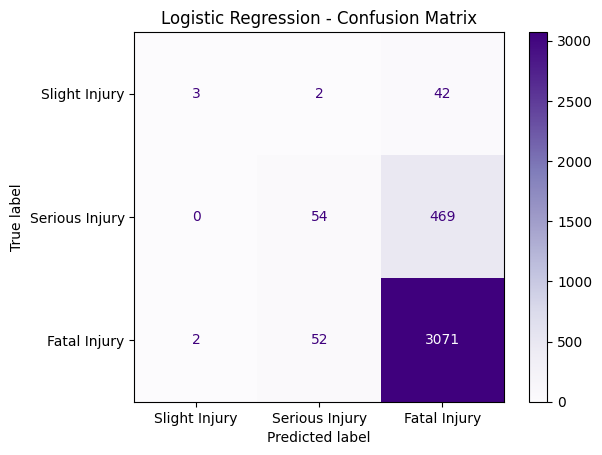

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score

# -----------------------
# LOAD AND PREPROCESS DATA
# -----------------------
data = pd.read_csv("RTA Dataset.csv")
data.columns = data.columns.str.strip()  # remove trailing spaces
data.dropna(subset=['Accident_severity'], inplace=True)

# Encode target
le = LabelEncoder()
data['Accident_severity'] = le.fit_transform(data['Accident_severity'])  # Slight=0, Serious=1, Fatal=2

# Drop target and get feature matrix
X = data.drop('Accident_severity', axis=1)
y = data['Accident_severity']

# Convert categorical vars to dummies (if not already encoded)
X = pd.get_dummies(X)

# Ensure consistent columns
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# -----------------------
# TRAIN MODELS
# -----------------------
rf_model = RandomForestClassifier(random_state=42)
dt_model = DecisionTreeClassifier(random_state=42)
log_model = LogisticRegression(max_iter=1000)

rf_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)
log_model.fit(X_train, y_train)

# -----------------------
# MAKE PREDICTIONS
# -----------------------
rf_preds = rf_model.predict(X_test)
dt_preds = dt_model.predict(X_test)
log_preds = log_model.predict(X_test)

# -----------------------
# LABELS
# -----------------------
labels = ['Slight Injury', 'Serious Injury', 'Fatal Injury']

# -----------------------
# METRICS + CONFUSION MATRICES
# -----------------------
for model_name, preds in zip(
    ['Random Forest', 'Decision Tree', 'Logistic Regression'],
    [rf_preds, dt_preds, log_preds]
):
    print(f"\n=== {model_name.upper()} ===")
    report = classification_report(y_test, preds, target_names=labels, output_dict=True)
    print(f"Accuracy: {accuracy_score(y_test, preds) * 100:.2f}%")
    print(f"Class 0 Recall: {report['Slight Injury']['recall'] * 100:.2f}%")
    print(f"Class 0 F1: {report['Slight Injury']['f1-score'] * 100:.2f}%")

    # Plot confusion matrix
    cm = confusion_matrix(y_test, preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap='Greens' if model_name == 'Decision Tree' else 'Blues' if model_name == 'Random Forest' else 'Purples')
    plt.title(f"{model_name} - Confusion Matrix")
    plt.show()
